# Random Forest 

In [4]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegressionCV,LogisticRegression
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay
from sklearn.cluster import KMeans


In [24]:
# Load cleaned and preprocessed data
X_train = pd.read_csv("data/X_train.csv", index_col=0).astype(float)
y_train = pd.read_csv("data/y_train.csv", index_col=0).astype(int)
y_train = pd.Series(y_train.values.ravel())
y_train.index = X_train.index
y_train_binary = pd.read_csv("data/y_train_binary.csv", index_col=0).astype(int)
y_train_binary = pd.Series(y_train_binary.values.ravel())
y_train_binary.index = X_train.index
X_test = pd.read_csv("data/X_test.csv", index_col=0).astype(float)
y_test = pd.read_csv("data/y_test.csv", index_col=0).astype(int)
y_test = pd.Series(y_test.values.ravel())
y_test.index = X_test.index
y_test_binary = pd.read_csv("data/y_test_binary.csv", index_col=0).astype(int)
y_test_binary = pd.Series(y_test_binary.values.ravel())
y_test_binary.index = X_test.index

#Lasso Regulization

Confusion Matrix (Test):
[[25528  5512  6972]
 [  290   234   402]
 [ 1408  1380  4231]]

Classification Report (Test):
              precision    recall  f1-score   support

           0       0.94      0.67      0.78     38012
           1       0.03      0.25      0.06       926
           2       0.36      0.60      0.45      7019

    accuracy                           0.65     45957
   macro avg       0.45      0.51      0.43     45957
weighted avg       0.83      0.65      0.72     45957


Classification Report (Train):
              precision    recall  f1-score   support

           0       0.76      0.71      0.73      4000
           1       0.58      0.44      0.50      2000
           2       0.52      0.72      0.61      2000

    accuracy                           0.64      8000
   macro avg       0.62      0.62      0.61      8000
weighted avg       0.66      0.64      0.64      8000



/var/folders/ct/gz2l61m13y595l77djnpfg480000gn/T/ipykernel_63375/48105028.py:44: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', n_classes)


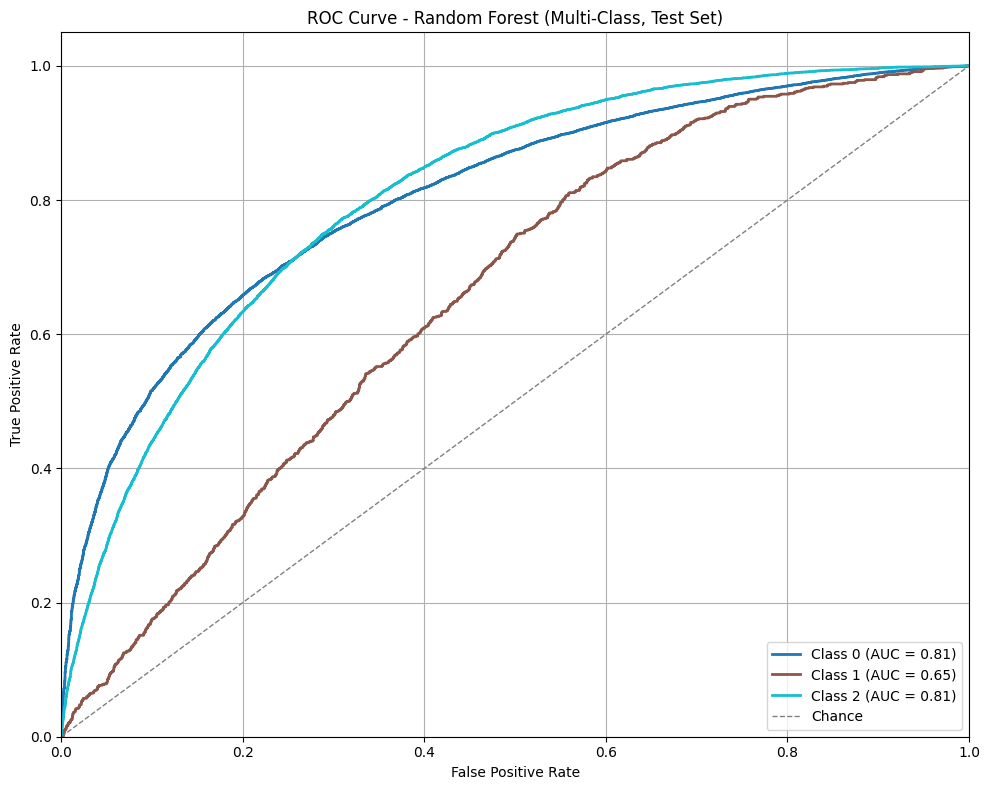

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# --- Train the model ---
rf_model = RandomForestClassifier(
    n_estimators=150,
    max_depth=8,
    random_state=42,
    class_weight='balanced'
)
rf_model.fit(X_train, y_train)

# --- Predictions ---
y_pred_train = rf_model.predict(X_train)
y_pred_test = rf_model.predict(X_test)

# --- Evaluation ---
print("Confusion Matrix (Test):")
print(confusion_matrix(y_test, y_pred_test))
print("\nClassification Report (Test):")
print(classification_report(y_test, y_pred_test))
print("\nClassification Report (Train):")
print(classification_report(y_train, rf_model.predict(X_train)))
# --- ROC Curve for all classes ---
classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)
y_score = rf_model.predict_proba(X_test)
n_classes = len(classes)

# Compute ROC curve and AUC for each class
fpr = {}
tpr = {}
roc_auc = {}

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# --- Plot ROC Curve for all classes ---
plt.figure(figsize=(10, 8))
colors = plt.cm.get_cmap('tab10', n_classes)

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f"Class {classes[i]} (AUC = {roc_auc[i]:.2f})", color=colors(i))

plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='gray', label='Chance')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest (Multi-Class, Test Set)")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


NameError: name 'y' is not defined

=== [Binary Classification: 0 vs (1+2)] ===
Confusion Matrix:
[[25894 12118]
 [ 1798  6147]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.68      0.79     38012
           1       0.34      0.77      0.47      7945

    accuracy                           0.70     45957
   macro avg       0.64      0.73      0.63     45957
weighted avg       0.83      0.70      0.73     45957



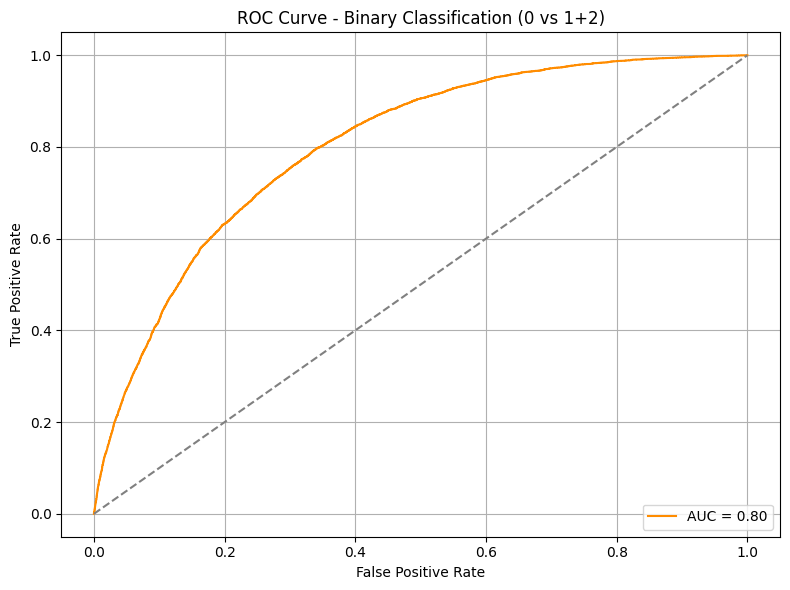


=== [Multi-Class Classification: 1 vs 2 only] ===
Confusion Matrix:
[[ 532  394]
 [2818 4201]]

Classification Report:
              precision    recall  f1-score   support

           1       0.16      0.57      0.25       926
           2       0.91      0.60      0.72      7019

    accuracy                           0.60      7945
   macro avg       0.54      0.59      0.49      7945
weighted avg       0.83      0.60      0.67      7945



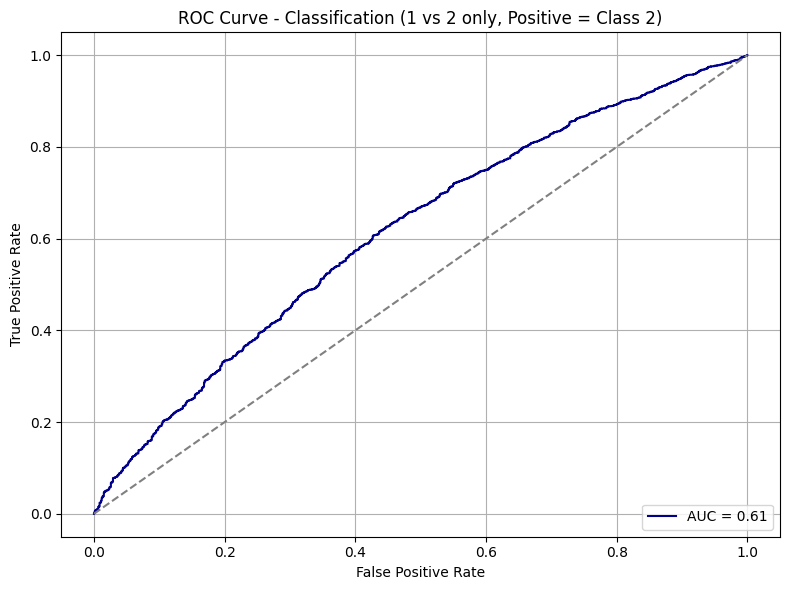

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

### ---------- TASK A: Binary classification (0 vs 1+2) ----------

# Use preprocessed binary data
X_train_bin = X_train
X_test_bin = X_test
y_train_bin = y_train_binary
y_test_bin = y_test_binary

# Train Random Forest
rf_bin = RandomForestClassifier(n_estimators=150, max_depth=11, class_weight='balanced', random_state=42)
rf_bin.fit(X_train_bin, y_train_bin)

# Predict
y_pred_bin = rf_bin.predict(X_test_bin)
y_score_bin = rf_bin.predict_proba(X_test_bin)[:, 1]

# Evaluation
print("=== [Binary Classification: 0 vs (1+2)] ===")
print("Confusion Matrix:")
print(confusion_matrix(y_test_bin, y_pred_bin))
print("\nClassification Report:")
print(classification_report(y_test_bin, y_pred_bin))

# ROC Curve
fpr_bin, tpr_bin, _ = roc_curve(y_test_bin, y_score_bin)
auc_bin = auc(fpr_bin, tpr_bin)

plt.figure(figsize=(8, 6))
plt.plot(fpr_bin, tpr_bin, label=f"AUC = {auc_bin:.2f}", color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("ROC Curve - Binary Classification (0 vs 1+2)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

### ---------- TASK B: Multi-class classification (1 vs 2) ----------

# Use original y_train and y_test to filter class 1 and 2 only
mask_train_12 = (y_train == 1) | (y_train == 2)
mask_test_12 = (y_test == 1) | (y_test == 2)

X_train_12 = X_train[mask_train_12]
y_train_12 = y_train[mask_train_12]
X_test_12 = X_test[mask_test_12]
y_test_12 = y_test[mask_test_12]

# Train
rf_12 = RandomForestClassifier(n_estimators=150, max_depth=11, class_weight='balanced', random_state=42)
rf_12.fit(X_train_12, y_train_12)

# Predict
y_pred_12 = rf_12.predict(X_test_12)
y_score_12 = rf_12.predict_proba(X_test_12)

# Evaluation
print("\n=== [Multi-Class Classification: 1 vs 2 only] ===")
print("Confusion Matrix:")
print(confusion_matrix(y_test_12, y_pred_12))
print("\nClassification Report:")
print(classification_report(y_test_12, y_pred_12))

# Binarize y_test_12: class 2 is positive class
y_test_12_bin = (y_test_12 == 2).astype(int)
classes_12 = np.unique(y_train_12)
y_score_class2 = y_score_12[:, list(classes_12).index(2)]

# ROC + AUC
fpr_12, tpr_12, _ = roc_curve(y_test_12_bin, y_score_class2)
roc_auc_12 = auc(fpr_12, tpr_12)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_12, tpr_12, label=f"AUC = {roc_auc_12:.2f}", color='darkblue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("ROC Curve - Classification (1 vs 2 only, Positive = Class 2)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


In [22]:
import os
os.makedirs("results", exist_ok=True)

np.save("results/y_pred_rf.npy", y_pred_test)